# Inversion for simulated rock sample

#### Import libraries

In [1]:
%matplotlib inline
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism, PolygonalPrism, PrismMesh
from fatiando.gravmag import sphere, prism, polyprism
from fatiando.gridder import regular

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'rock_sample_analysis.ipynb'

#### Importing auxiliary functions

In [3]:
dir_modules = '../../'
sys.path.append(dir_modules)

In [4]:
import my_package as fc

## Loading data 

In [5]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Loading Regular grid

In [6]:
with open('data/regular_grid.pickle') as f:
        grid = pickle.load(f)

## Loading results for inversion

In [7]:
with open('data/inversion.pickle') as f:
        inversion = pickle.load(f)

#### List of saved files

In [8]:
saved_files = []

### Parameters of acquisition

In [9]:
xp,yp,zp = grid['x'],grid['y'],grid['z']

In [10]:
Nx,Ny = grid['Nx'],grid['Ny']

### The true data

In [11]:
Bz_obs = data['bz_obs']
Bx_obs = data['bx_obs']
By_obs = data['by_obs']
B_obs = data['B_obs']

## Results of inversion

In [12]:
bz = inversion['bz'] 
bx = inversion['bx']
by = inversion['by'] 
B = inversion['B']
zc = inversion['zc'] 
p = inversion['p'] 
inc = inversion['inc'] 
dec = inversion['dec'] 

## Calculating residuals

In [13]:
res_z = Bz_obs - bz
res_x = Bx_obs - bx
res_y = By_obs - by
res_B = B_obs - B

### Result Analysis

### Data fitting

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


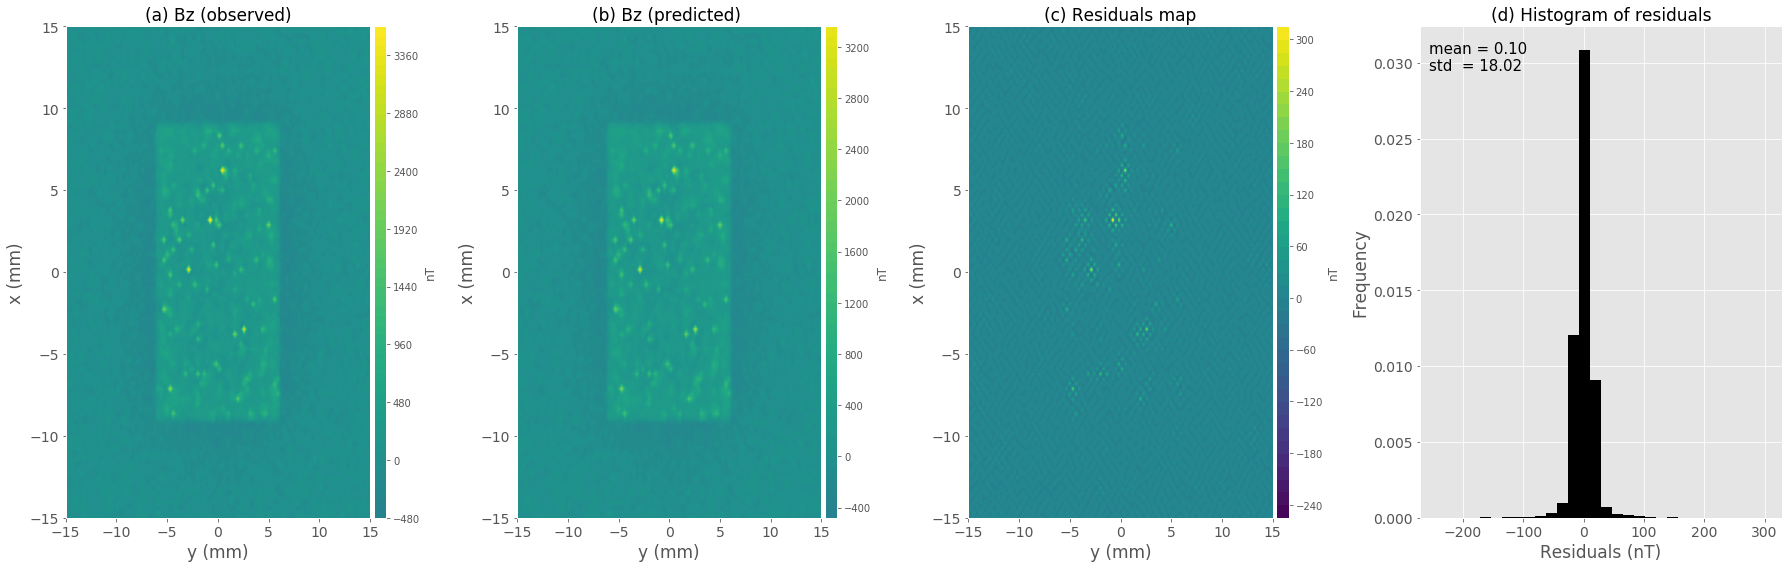

In [14]:
title_font = 17
bottom_font = 14
plt.figure(figsize=(25,8), tight_layout=True)
plt.style.use('ggplot')

ranges = np.abs([data['bz_obs'].max(),
                 data['bz_obs'].min()]).max()

ax1=plt.subplot(1,4,1)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['bz_obs'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(a) Bz (observed)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax2=plt.subplot(1,4,2)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bz.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(b) Bz (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax3=plt.subplot(1,4,3)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_z.reshape(grid['shape']),50,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax4=plt.subplot(1,4,4)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_z), np.std(res_z)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_z,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)

########################################################################### 
file_name = 'figs/results_data_fitting_Bz'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

### Visualization of calculated components

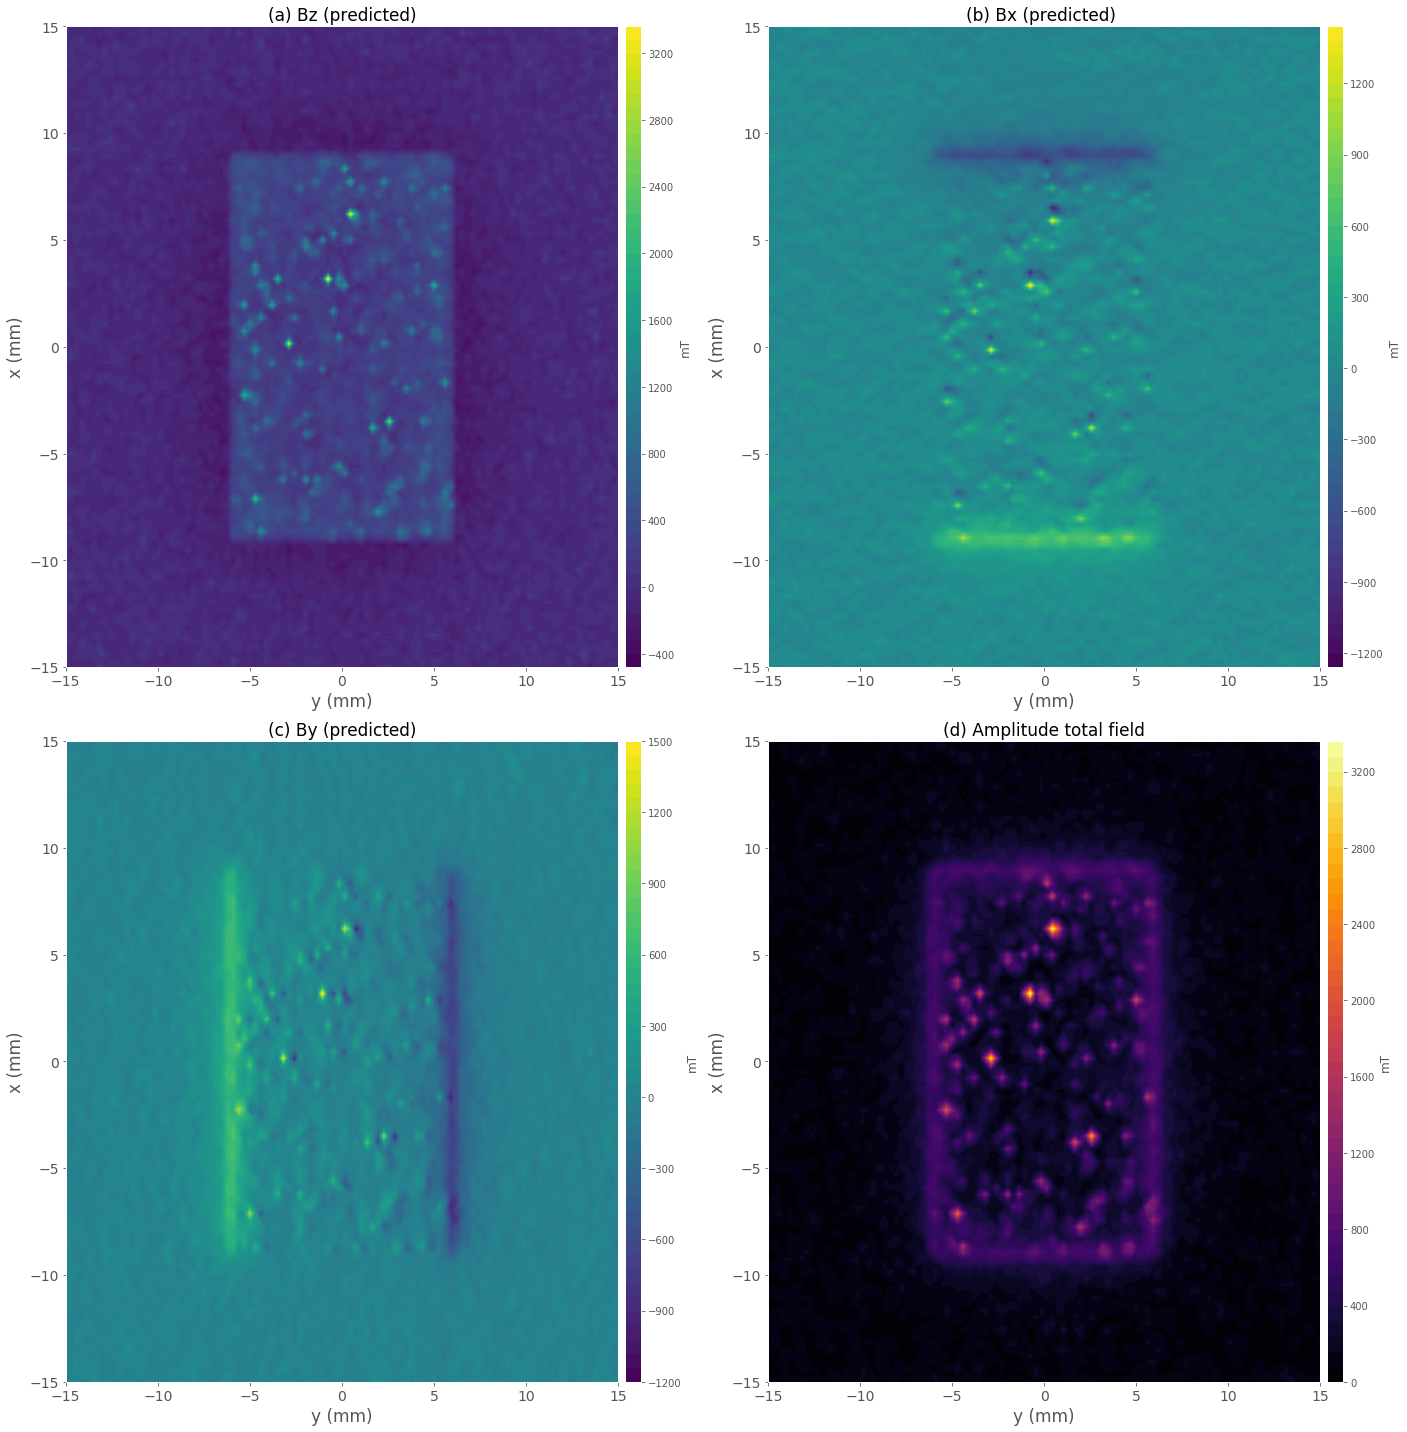

In [15]:
title_font = 17
bottom_font = 14
plt.figure(figsize=(20,20), tight_layout=True)
plt.style.use('ggplot')


ax1=plt.subplot(2,2,1)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bz.reshape(grid['shape']),50,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('mT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(a) Bz (predicted)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax2=plt.subplot(2,2,2)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bx.reshape(grid['shape']),50,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('mT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(b) Bx (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax3=plt.subplot(2,2,3)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             by.reshape(grid['shape']),50,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('mT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(c) By (predicted)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax4=plt.subplot(2,2,4)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             B.reshape(grid['shape']),50,cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('mT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(d) Amplitude total field', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

########################################################################### 
file_name = 'figs/field_components_eqlayer'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

### Comparison component by component

## Comparison with the true and calculated

### For Bx

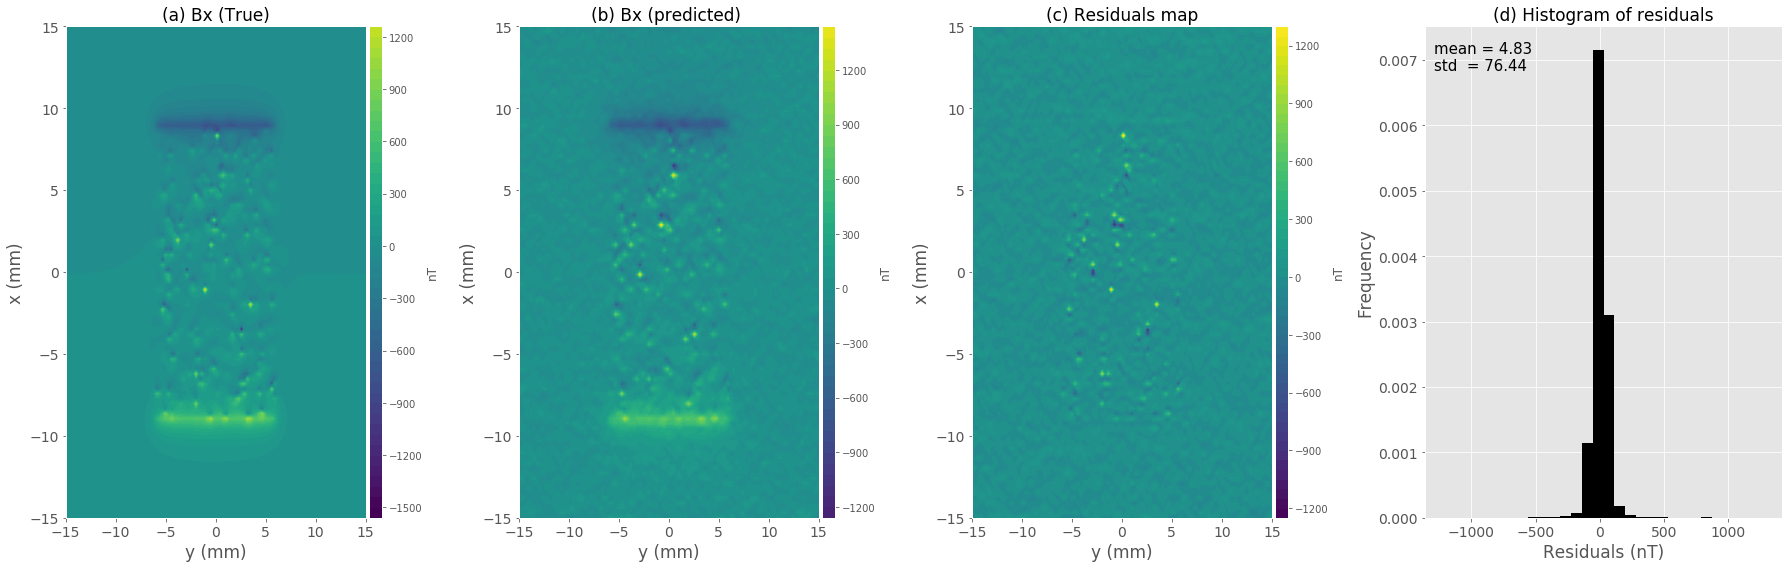

In [17]:
title_font = 17
bottom_font = 14
plt.figure(figsize=(25,8), tight_layout=True)
plt.style.use('ggplot')

ranges = np.abs([data['bx_obs'].max(),
                 data['bx_obs'].min()]).max()

ax1=plt.subplot(1,4,1)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['bx_obs'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(a) Bx (True)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax2=plt.subplot(1,4,2)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             bx.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(b) Bx (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax3=plt.subplot(1,4,3)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_x.reshape(grid['shape']),50,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax4=plt.subplot(1,4,4)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_x), np.std(res_x)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_x,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)

########################################################################### 
file_name = 'figs/results_data_fitting_bx'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

### For By

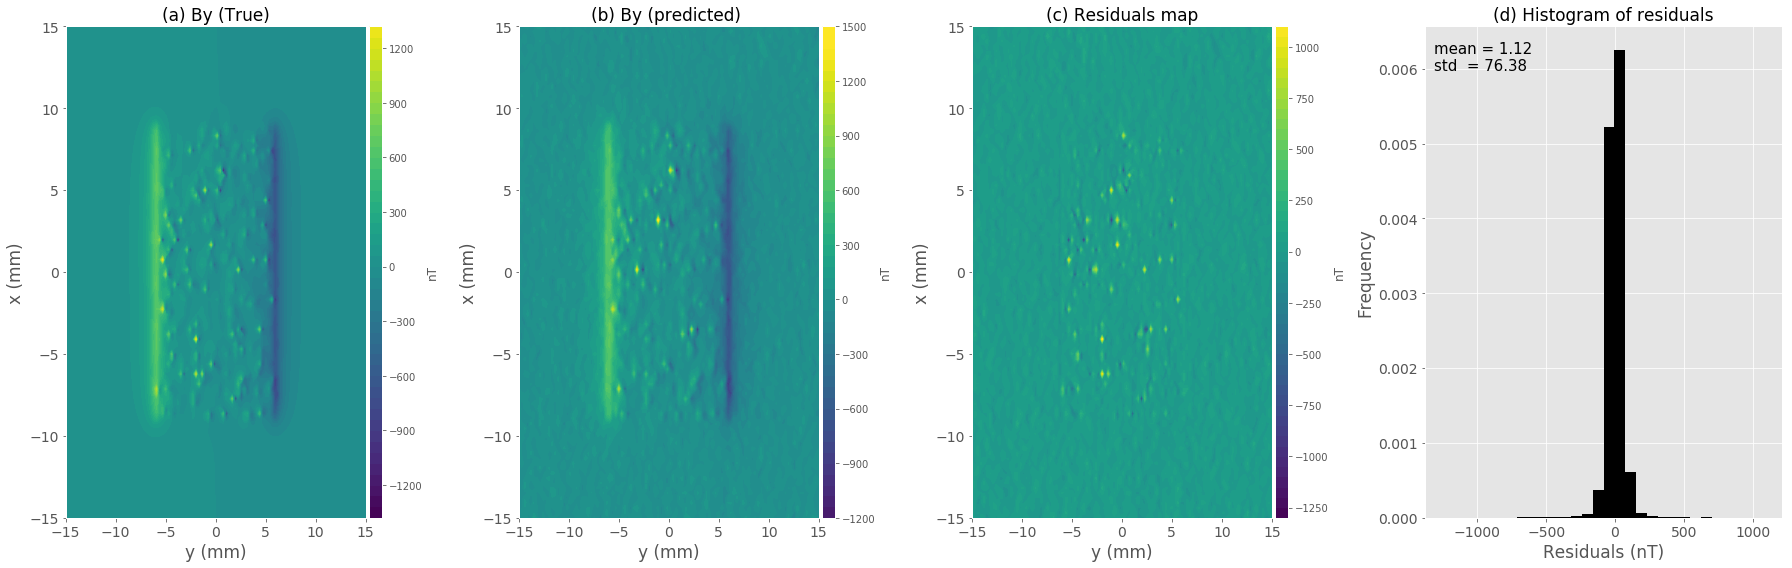

In [18]:
title_font = 17
bottom_font = 14
plt.figure(figsize=(25,8), tight_layout=True)
plt.style.use('ggplot')

ranges = np.abs([data['by_obs'].max(),
                 data['by_obs'].min()]).max()

ax1=plt.subplot(1,4,1)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['by_obs'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(a) By (True)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax2=plt.subplot(1,4,2)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             by.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(b) By (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax3=plt.subplot(1,4,3)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_y.reshape(grid['shape']),50,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax4=plt.subplot(1,4,4)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_y), np.std(res_y)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_y,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)

########################################################################### 
file_name = 'figs/results_data_fitting_by'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()

## For Amplitude of B

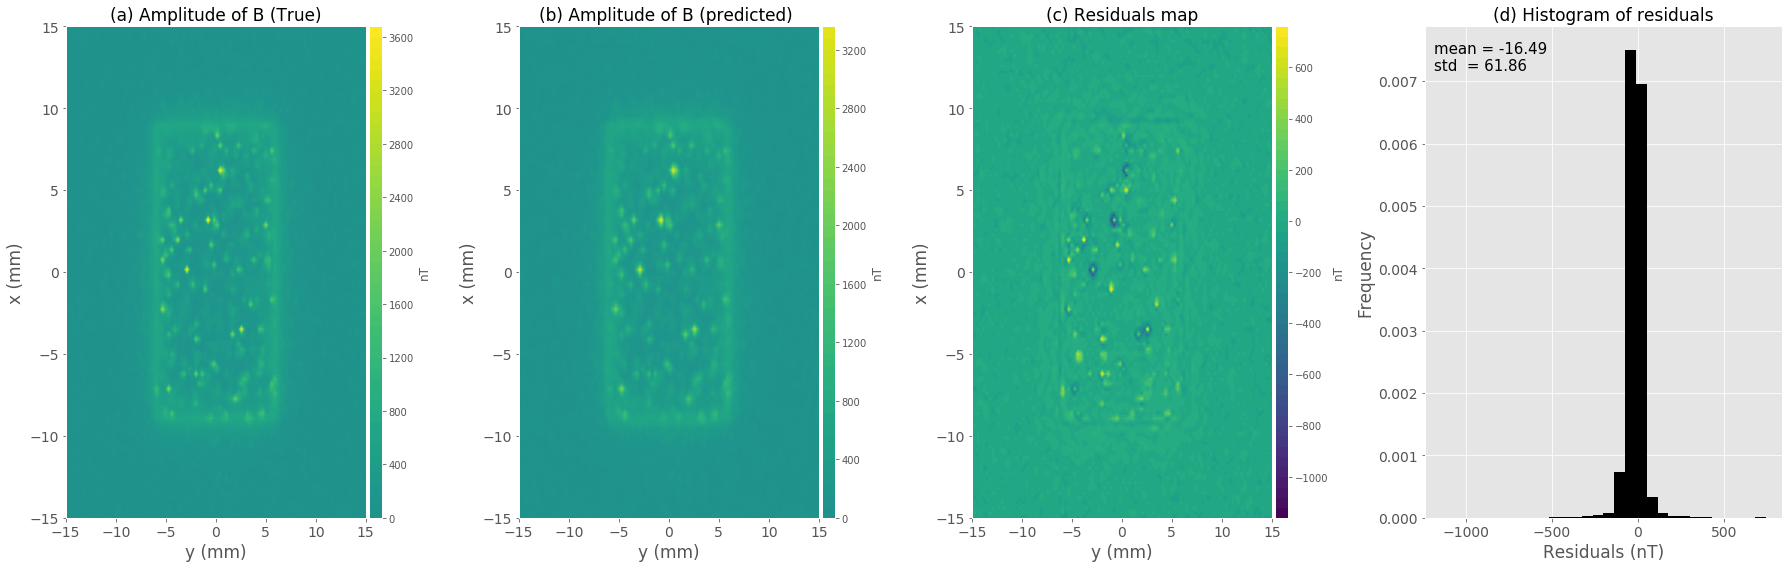

In [19]:
title_font = 17
bottom_font = 14
plt.figure(figsize=(25,8), tight_layout=True)
plt.style.use('ggplot')

ranges = np.abs([data['B_obs'].max(),
                 data['B_obs'].min()]).max()

ax1=plt.subplot(1,4,1)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             data['B_obs'].reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(a) Amplitude of B (True)', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax2=plt.subplot(1,4,2)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             B.reshape(grid['shape']),
             50,cmap='viridis',vmin=-ranges,vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(b) Amplitude of B (predicted) ', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax3=plt.subplot(1,4,3)
plt.contourf(1e-3*yp.reshape(grid['shape']),
             1e-3*xp.reshape(grid['shape']),
             res_B.reshape(grid['shape']),50,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(c) Residuals map', fontsize=title_font)
plt.xlabel('y (mm)',fontsize = title_font)
plt.ylabel('x (mm)',fontsize = title_font)

ax4=plt.subplot(1,4,4)
plt.text(0.025, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res_B), np.std(res_B)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=15)
n, bins, patches = plt.hist(res_B,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-.0000008,0.0,.00000008])
#ax4.set_yticks([.0,10])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)

########################################################################### 
file_name = 'figs/results_data_fitting_B'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.show()